In [2]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

In [3]:
columns_used = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name', 'unique_key']

In [4]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status', parse_dates = ['created_date'], usecols = columns_used)

In [5]:
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-10-17 16:57:37,44081416,HEAT/HOT WATER,"10,463.000",225 WEST 232 STREET,WEST 232 STREET,BRONX,BRONX,40.880,-73.904,RESIDENTIAL BUILDING
1,2019-10-17 18:04:24,44082732,HEAT/HOT WATER,"10,032.000",261 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,NEW YORK,MANHATTAN,40.844,-73.941,RESIDENTIAL BUILDING
2,2019-10-17 22:40:04,44081467,HEAT/HOT WATER,"10,033.000",350 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,NEW YORK,MANHATTAN,40.847,-73.940,RESIDENTIAL BUILDING
3,2019-10-17 09:47:43,44080113,HEAT/HOT WATER,"11,211.000",276 SOUTH 1 STREET,SOUTH 1 STREET,BROOKLYN,BROOKLYN,40.712,-73.956,RESIDENTIAL BUILDING
4,2019-10-17 10:24:21,44081316,HEAT/HOT WATER,"10,021.000",530 EAST 76 STREET,EAST 76 STREET,NEW YORK,MANHATTAN,40.769,-73.951,RESIDENTIAL BUILDING


In [6]:
df['complaint_type'].value_counts()

HEATING                   558489
GENERAL CONSTRUCTION      361749
PLUMBING                  306572
PAINT - PLASTER           264198
NONCONST                  193254
ELECTRIC                  110017
HPD Literature Request     52830
APPLIANCE                  35176
HEAT/HOT WATER             10600
UNSANITARY CONDITION        5857
CONSTRUCTION                3677
PAINT/PLASTER               2758
WATER LEAK                  2646
DOOR/WINDOW                 2017
GENERAL                     1279
FLOORING/STAIRS             1048
SAFETY                       595
ELEVATOR                     102
OUTSIDE BUILDING              51
Unsanitary Condition          25
General                       15
Safety                         4
Appliance                      1
AGENCY                         1
Name: complaint_type, dtype: int64

In [12]:
# Set the top complaint variable
df_top_complaint = df[df['complaint_type'] == 'HEATING'].reset_index(drop = True)
df_top_complaint.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2012-10-31,24321690,HEATING,"10,034.000",97 SHERMAN AVENUE,SHERMAN AVENUE,NEW YORK,MANHATTAN,40.864,-73.925,RESIDENTIAL BUILDING
1,2012-10-31,24318330,HEATING,"11,354.000",25-03 124 STREET,124 STREET,FLUSHING,QUEENS,40.776,-73.844,RESIDENTIAL BUILDING
2,2012-10-31,24318193,HEATING,"10,034.000",97 SHERMAN AVENUE,SHERMAN AVENUE,NEW YORK,MANHATTAN,40.864,-73.925,RESIDENTIAL BUILDING
3,2012-10-31,24314822,HEATING,"10,458.000",406 EAST 184 STREET,EAST 184 STREET,BRONX,BRONX,40.857,-73.895,RESIDENTIAL BUILDING
4,2012-10-31,24311080,HEATING,"10,458.000",2408 CAMBRELENG AVENUE,CAMBRELENG AVENUE,BRONX,BRONX,40.855,-73.885,RESIDENTIAL BUILDING


In [13]:
df_top_complaint.shape

(558489, 11)

In [14]:
df_top_complaint['borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

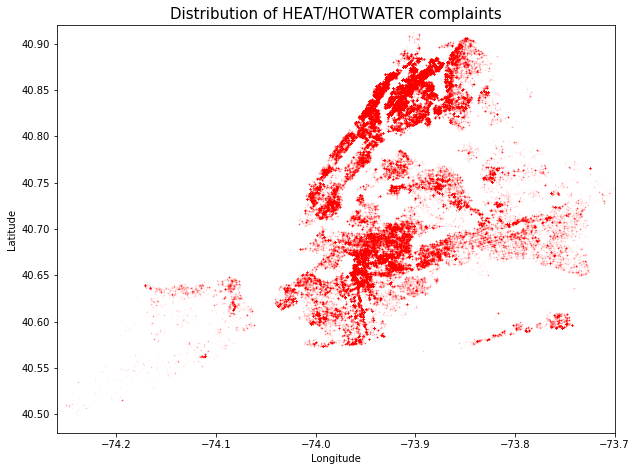

In [15]:
# adjust settings
plt.figure(figsize=(10,7.5))

# create scatterplots
plt.scatter(df_top_complaint.longitude, df_top_complaint.latitude, alpha=0.02, s=1, color='red')

# adjust more settings
plt.title('Distribution of HEATING complaints', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.48,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)

plt.show()

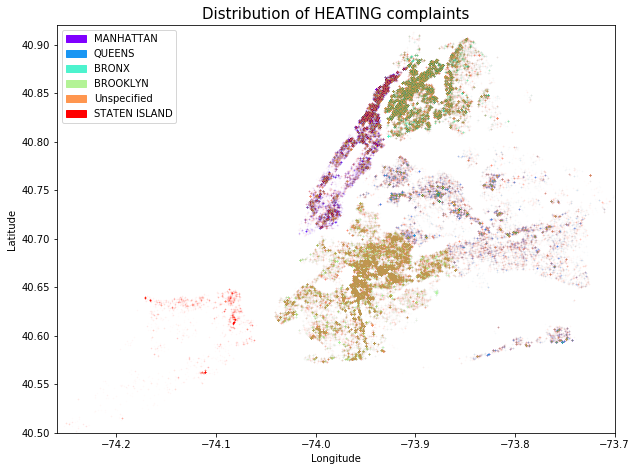

In [18]:
import matplotlib.patches as mpatches
# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_borough = list(df_top_complaint['borough'].unique())
# container for patches used in legends
patches = []

# setting color map
color_map = plt.cm.rainbow(np.linspace(0,1, len(list_value_borough)))
                           
for index, value in enumerate(list_value_borough):
    borough_top_complaint = df_top_complaint[df_top_complaint['borough']== value]
    # create scatterplots
    plt.scatter(borough_top_complaint.longitude, borough_top_complaint.latitude, s=1, 
                alpha=0.02,color= color_map[index], marker ='.')
    # create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_borough, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of HEATING complaints', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()

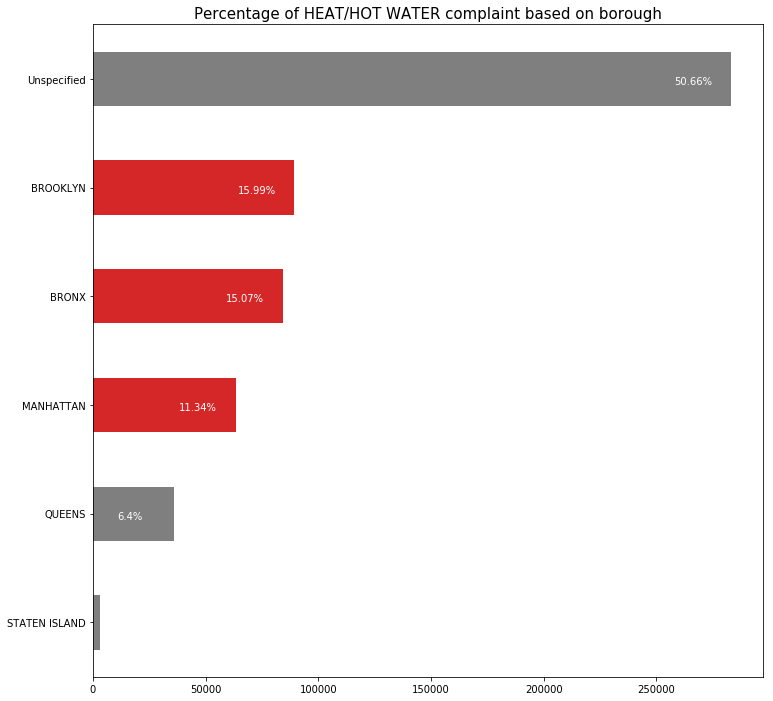

In [25]:
# Set bar color scheme
colors1 = ['C7', 'C7', 'C3', 'C3', 'C3']

borough_series_df = df_top_complaint['borough'].value_counts()
borough_series_df.sort_values(ascending = True, inplace =True)
total_borough = borough_series_df.sum()

# Create barh plot
borough_series_df.plot(kind = 'barh', figsize = (12, 12), color = colors1)

# Set text label to show the percentage of each borough
for index, value in enumerate(borough_series_df):
    label =  '{}%'.format(round((value/total_borough)*100, 2)) 
    plt.annotate(label, xy=(value - 25000, index- 0.05), color='white')

    
plt.title('Percentage of HEAT/HOT WATER complaint based on borough', size=15)
plt.show()

In [26]:
df_top_complaint['incident_zip'].unique()

array([10034., 11354., 10458., 10029., 10467., 10032., 10460., 10451.,
       10025., 11221., 11207., 10016., 10128., 10003., 10472., 11209.,
       11225., 10030., 11226., 10463., 10009., 10038., 11378., 10452.,
       10026., 11366., 10466., 10033., 11372., 11238., 11235., 10028.,
       11232., 10462., 10455., 10474., 10002., 10027., 10014., 11374.,
       10031., 11373., 11367., 11230., 11204., 11355., 11212., 10019.,
       10010., 10012., 11104., 10461., 11103., 10456., 11413., 11385.,
       11215., 10037., 11423., 10457., 11377., 11223., 11105., 11211.,
       11691.,    nan, 11368., 11208., 11218., 11236., 10040., 11213.,
       10468., 10453., 10470., 11237., 11694., 11216., 11417., 11220.,
       10001., 11205., 11416., 11210., 11203., 10011., 11375., 10075.,
       11432., 10022., 11214., 11233., 10023., 10024., 10013., 11421.,
       10459., 10469., 11229., 11434., 11101., 11222., 11419., 10306.,
       11201., 11219., 11106., 11239., 11435., 10305., 11206., 11692.,
      

In [27]:
df_top_complaint[df_top_complaint['incident_zip'].isnull()]

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
309,2012-01-28,22613533,HEATING,nan,94-20 66 AVENUE,66 AVENUE,NaN,QUEENS,nan,nan,RESIDENTIAL BUILDING
310,2012-01-28,22613437,HEATING,nan,33-16 81 STREET,81 STREET,NaN,QUEENS,nan,nan,RESIDENTIAL BUILDING
625,2010-11-01,19023113,HEATING,nan,146-26 BURLING STREET,BURLING STREET,NaN,Unspecified,nan,nan,RESIDENTIAL BUILDING
950,2011-01-25,19682256,HEATING,nan,102-23 HARACE HARDING EXPRESSWAY,HARACE HARDING EXPRESSWAY,NaN,Unspecified,nan,nan,RESIDENTIAL BUILDING
1045,2013-04-02,25284935,HEATING,nan,4128 CARPENTER AVENUE,CARPENTER AVENUE,NaN,BRONX,nan,nan,RESIDENTIAL BUILDING
1046,2012-04-06,23017321,HEATING,nan,999 WEST FARMS RD,WEST FARMS RD,NaN,BRONX,nan,nan,RESIDENTIAL BUILDING
1051,2012-04-20,23095739,HEATING,nan,2219 54 ST,54 ST,NaN,BROOKLYN,nan,nan,RESIDENTIAL BUILDING
1052,2012-05-01,23154522,HEATING,nan,18-22 CENTER STREET,CENTER STREET,NaN,QUEENS,nan,nan,RESIDENTIAL BUILDING
1053,2012-05-08,23195958,HEATING,nan,7602 NOSTRAND AVENUE,NOSTRAND AVENUE,NaN,BROOKLYN,nan,nan,RESIDENTIAL BUILDING
1054,2012-06-05,23363115,HEATING,nan,129-30 155 STREET,155 STREET,NaN,QUEENS,nan,nan,RESIDENTIAL BUILDING


In [28]:
zip_series_df = df_top_complaint['incident_zip'].value_counts().head(10)
zip_series_df

10,467.000    17103
11,226.000    16911
10,458.000    16833
10,468.000    14175
10,453.000    13910
10,040.000    13696
10,452.000    13176
10,457.000    11494
11,225.000    11310
10,456.000    11118
Name: incident_zip, dtype: int64

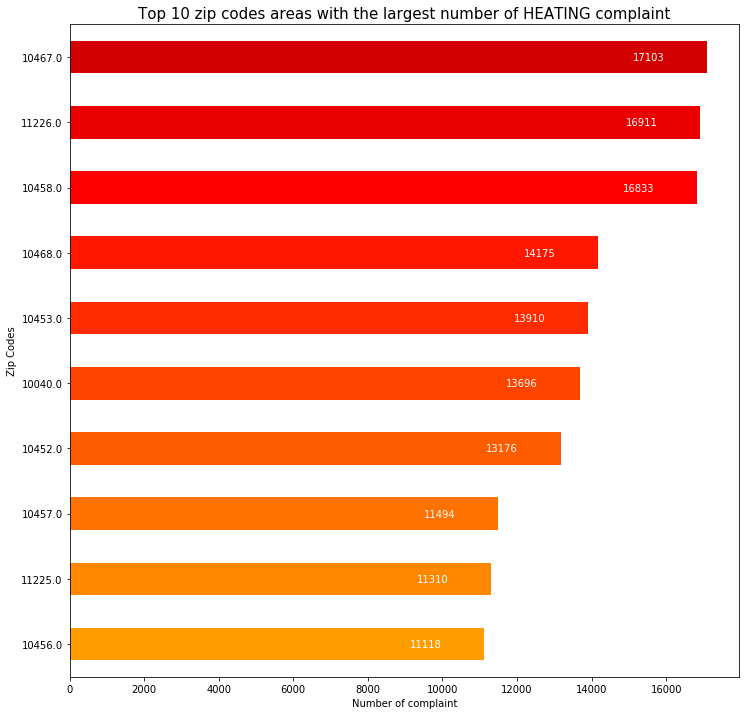

In [32]:
# Set bar color scheme
colors2= plt.cm.hot(np.linspace(0.6, 0.3, 10))

zip_series_df.sort_values(ascending = True, inplace =True)

# Create barh plot
zip_series_df.plot(kind = 'barh', figsize = (12, 12), color = colors2)

# Set text label to show the percentage of each borough
for index, value in enumerate(zip_series_df):
    label =  '{}'.format(value) 
    plt.annotate(label, xy=(value - 2000, index- 0.05), color='white')

# adjust more settings
plt.title('Top 10 zip codes areas with the largest number of HEATING complaint', size=15)
plt.xlabel('Number of complaint',size=10)
plt.ylabel('Zip Codes',size=10)
plt.show()

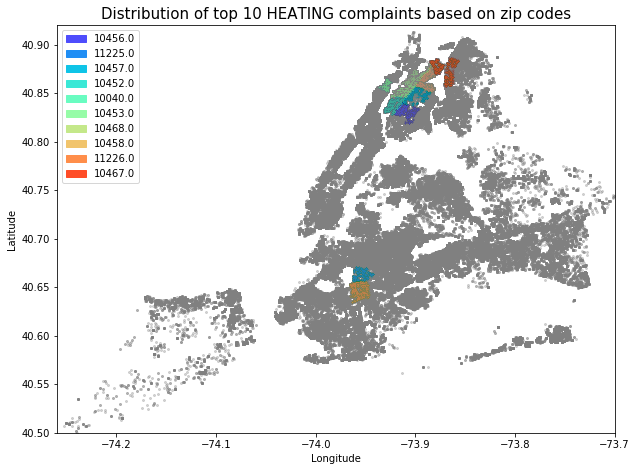

In [38]:
# adjust settings
plt.figure(figsize=(10,7.5))

# list of unique values in borough column
list_value_zip = zip_series_df.keys()
# container for patches used in legends
patches = []

# setting color map
color_map = plt.cm.rainbow(np.linspace(0.1, 0.9, 10))

# create new york map using scatter plot
plt.scatter(df_top_complaint.longitude, df_top_complaint.latitude, alpha=0.3, s=4, color='grey')

for index, value in enumerate(list_value_zip):
    zip_top_complaint = df_top_complaint[df_top_complaint['incident_zip']== value]
    # create scatterplots
    plt.scatter(zip_top_complaint.longitude, zip_top_complaint.latitude, s=1, 
                alpha=0.02,color= color_map[index], marker ='.')
    # create a patch 
    patches.append(mpatches.Patch(label=value, color=color_map[index]))

# create legend
plt.legend(patches,
           list_value_zip, 
           loc='upper left', prop={'size':10})

# adjust more settings
plt.title('Distribution of top 10 HEATING complaints based on zip codes', size=15)
plt.xlim((-74.26,-73.7))
plt.ylim((40.5,40.92))
plt.xlabel('Longitude',size=10)
plt.ylabel('Latitude',size=10)
plt.show()

In [39]:
df_top_complaint[df_top_complaint['street_name'].isnull()]

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
12152,2011-11-07,21833329,HEATING,nan,NaN,NaN,NaN,BRONX,nan,nan,RESIDENTIAL BUILDING


In [40]:
street_series_df = df_top_complaint.groupby(['borough'])
street_series_df = street_series_df['street_name'].value_counts().sort_values(ascending = False).head(10)
street_series_df

borough      street_name       
BRONX        GRAND CONCOURSE       4900
Unspecified  GRAND CONCOURSE       4489
MANHATTAN    ARDEN STREET          3488
Unspecified  BROADWAY              2811
             OCEAN AVENUE          2805
BROOKLYN     OCEAN AVENUE          2789
MANHATTAN    BROADWAY              2731
Unspecified  ST NICHOLAS AVENUE    2287
             MORRIS AVENUE         2243
             ARDEN STREET          2163
Name: street_name, dtype: int64

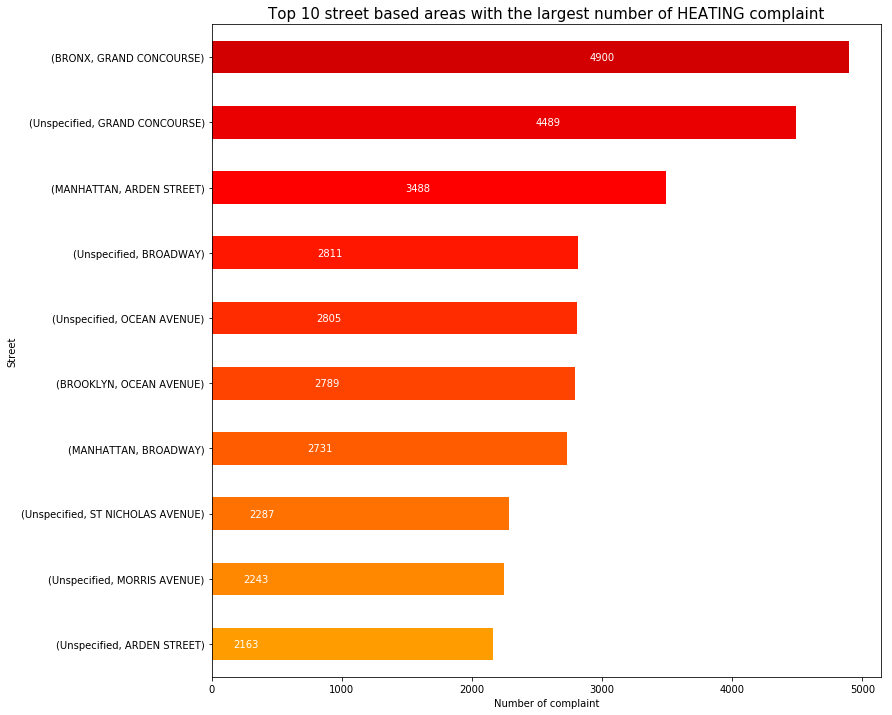

In [42]:
street_series_df.sort_values(ascending = True, inplace =True)

# Create barh plot
street_series_df.plot(kind = 'barh', figsize = (12, 12), color = colors2)

# Set text label to show the percentage of each borough
for index, value in enumerate(street_series_df):
    label =  '{}'.format(value) 
    plt.annotate(label, xy=(value - 2000, index- 0.05), color='white')

# adjust more settings
plt.title('Top 10 street based areas with the largest number of HEATING complaint', size=15)
plt.xlabel('Number of complaint',size=10)
plt.ylabel('Street',size=10)
plt.show()

Therefore, if the Department of Housing Preservation and Development of New York City wanted to focus on a particular set of boroughs, zip codes or street it should be Brooklyn, and 10467 and Gran Concourse, respectively.